Dataset Link:
https://drive.google.com/file/d/1DLjBn6uLiCT6Cg8TtR87cK-lYwaOQr6F/view?usp=sharing


Dataset column information:



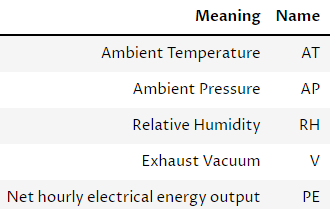

##Q1 Import the libraries and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
link= f'https://drive.google.com/file/d/1DLjBn6uLiCT6Cg8TtR87cK-lYwaOQr6F/view?usp=sharing'
df=pd.read_csv('/content/drive/MyDrive/Data.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


##Q2 Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
features = ['AT', 'V', 'AP', 'RH', 'PE']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=features)
print(df_scaled.head())

         AT         V        AP        RH        PE
0 -0.629519 -0.987297  1.820488 -0.009519  0.521208
1  0.741909  0.681045  1.141863 -0.974621 -0.585664
2 -1.951297 -1.173018 -0.185078  1.289840  2.003679
3  0.162205  0.237203 -0.508393  0.228160 -0.462028
4 -1.185069 -1.322539 -0.678470  1.596699  1.144666


##Q3 Split the dataset into the Training set and Test set

In [19]:
from sklearn.model_selection import train_test_split
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'
X = df_scaled[features]
y = df_scaled[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (7654, 4) (7654,)
Test set shape: (1914, 4) (1914,)


##Q4 Implement SVR

In [22]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svm_regressor = SVR(kernel='linear', C=1.0)
svm_regressor.fit(X_train, y_train)
y_pred_regression = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_regression)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0704843305420682


###4a RBF Kernel

In [23]:
svm_regressor_rbf = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_regressor_rbf.fit(X_train, y_train)
y_pred_regression_rbf = svm_regressor_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_regression_rbf)
print("Mean Squared Error (RBF Kernel):", mse_rbf)

Mean Squared Error (RBF Kernel): 0.052935005779458776


###4b Linear Kernel

In [24]:
svm_regressor_linear = SVR(kernel='linear', C=1.0)
svm_regressor_linear.fit(X_train, y_train)
y_pred_regression_linear = svm_regressor_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_regression_linear)
print("Mean Squared Error (Linear Kernel):", mse_linear)

Mean Squared Error (Linear Kernel): 0.0704843305420682


###4c Polynomial Kernel

In [25]:
svm_regressor_poly = SVR(kernel='poly', degree=3, C=1.0)
svm_regressor_poly.fit(X_train, y_train)
y_pred_regression_poly = svm_regressor_poly.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_regression_poly)
print("Mean Squared Error (Polynomial Kernel):", mse_poly)

Mean Squared Error (Polynomial Kernel): 0.23392116501744334


###4d Sigmoid Kernel

In [26]:
svm_regressor_sigmoid = SVR(kernel='sigmoid', C=1.0, gamma='scale')
svm_regressor_sigmoid.fit(X_train, y_train)
y_pred_regression_sigmoid = svm_regressor_sigmoid.predict(X_test)
mse_sigmoid = mean_squared_error(y_test, y_pred_regression_sigmoid)
print("Mean Squared Error (Sigmoid Kernel):", mse_sigmoid)

Mean Squared Error (Sigmoid Kernel): 25650.18473413331
